## Imports

In [36]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

## Load The Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("rtatman/chocolate-bar-ratings")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chocolate-bar-ratings' dataset.
Path to dataset files: /kaggle/input/chocolate-bar-ratings


In [3]:
print(os.listdir(path))

['flavors_of_cacao.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'flavors_of_cacao.csv'))

## Explore The Data

In [21]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,0.70,France,2.75,,Togo
2,A. Morin,Atsane,0.70,France,3.00,,Togo
3,A. Morin,Akata,0.70,France,3.50,,Togo
4,A. Morin,Quilla,0.70,France,3.50,,Peru


In [6]:
df.shape

(1795, 9)

In [7]:
df.isna().sum().sum()

np.int64(2)

In [8]:
df.isna().sum().index

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

# Preprocessing

In [15]:
df.isna().sum()

,0
Company \n(Maker-if known),0
Specific Bean Origin\nor Bar Name,0
Cocoa\nPercent,0
Company\nLocation,0
Rating,0
Bean\nType,0
Broad Bean\nOrigin,0


In [12]:
df = df.dropna().reset_index(drop=True)

In [14]:
drops = ['REF','Review\nDate']
df = df.drop(drops,axis=1)

In [20]:
df["Cocoa\nPercent"] = df["Cocoa\nPercent"].apply(lambda x:x.strip('%') ).astype(float)/100

In [22]:
df['Broad Bean\nOrigin'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [23]:
df['Company\nLocation'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

In [28]:
df.head()

,Company,SpecificOrigin,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,0.70,France,2.75,,Togo
2,A. Morin,Atsane,0.70,France,3.00,,Togo
3,A. Morin,Akata,0.70,France,3.50,,Togo
4,A. Morin,Quilla,0.70,France,3.50,,Peru


In [30]:
df['BeanType'].unique()

array(['\xa0', 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [31]:
df.columns = ['Company', 'SpecificOrigin', 'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin']

In [33]:
cat = ['Company','SpecificOrigin','Location','BeanType','BroadOrigin']


dummys = pd.get_dummies(df[cat],drop_first=False).astype(int)
df = pd.concat([df,dummys],axis=1)
df = df.drop(cat, axis=1)

df.head()

,CocoaPercent,Rating,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,...,BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa,BroadOrigin_
0,0.63,3.75,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,2.75,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,3.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.70,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.70,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.shape

(1793, 1656)

## Train Test Split

In [35]:
y = df['Rating']
X = df.drop('Rating', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## NN Model

In [39]:
X.shape


(1793, 1655)

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

model = tf.keras.Sequential([
    layers.Input(shape=(1655,)),

    # Block 1
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Block 2
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Block 3
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output (for regression)
    layers.Dense(1)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       423,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,945 (1.78 MB)

 Trainable params: 466,049 (1.78 MB)

 Non-trainable params: 896 (3.50 KB)

In [48]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)

In [49]:
epochs = 32
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 11.2743 - mae: 3.0714 - val_loss: 8.5659 - val_mae: 2.8779
Epoch 2/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4497 - mae: 2.6747 - val_loss: 6.6236 - val_mae: 2.5180
Epoch 3/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2617 - mae: 2.2878 - val_loss: 4.8590 - val_mae: 2.1387
Epoch 4/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2107 - mae: 1.7983 - val_loss: 2.6202 - val_mae: 1.5282
Epoch 5/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6154 - mae: 1.3380 - val_loss: 1.0179 - val_mae: 0.8811
Epoch 6/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7609 - mae: 1.0436 - val_loss: 0.5039 - val_mae: 0.5529
Epoch 7/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3579 - mae: 0.8908 - val_loss: 0.3272 - val_mae: 0.4150
Epoch 8/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1837 - mae: 0.8402 - val_loss: 0.3031 - val_mae: 0.3944
Epoch 9/32
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.04

## See if there is any overfitting

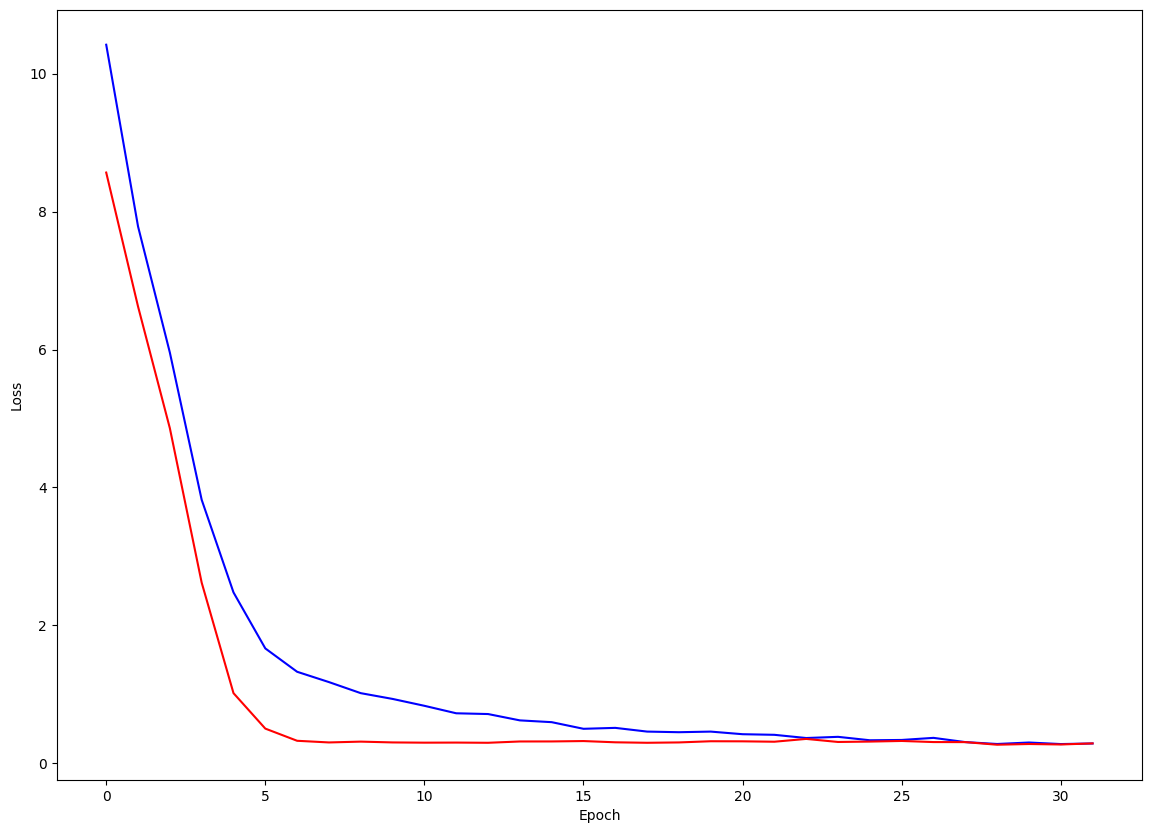

In [50]:
plt.figure(figsize=(14, 10))

plt.plot(range(epochs), history.history['loss'], color='b')
plt.plot(range(epochs), history.history['val_loss'], color='r')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

## Evaluate the model

In [51]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

Test Loss: [0.25656190514564514, 0.3542461395263672]


In [52]:
# Make a prediction on a new example
# You can replace this with your own new data
new_example = X_test.iloc[0].values.reshape(1, -1)  # Using the first example from the test set
prediction = model.predict(new_example)
print(f"Prediction for the new example: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction for the new example: 3.2281711101531982
